In [1]:
from gsmmutils import DATA_PATH
from gsmmutils.dynamic.sensitivity_analysis import SensitivityAnalysis
from gsmmutils.experimental.exp_matrix import ExpMatrix
from gsmmutils.graphics.plot import lineplot
matrix = ExpMatrix(f"{DATA_PATH}/experimental/Matriz- DCCR Dunaliella salina_dfba.xlsx", conditions = "Resume")
analysis = SensitivityAnalysis(matrix)
analysis.load_parameters(f"{DATA_PATH}/dfba/inputs/initial_parameters.json")

In [15]:
load_model('/home/emanuel/Downloads/Caravagna2010.cps')

NameError: name 'load_model' is not defined

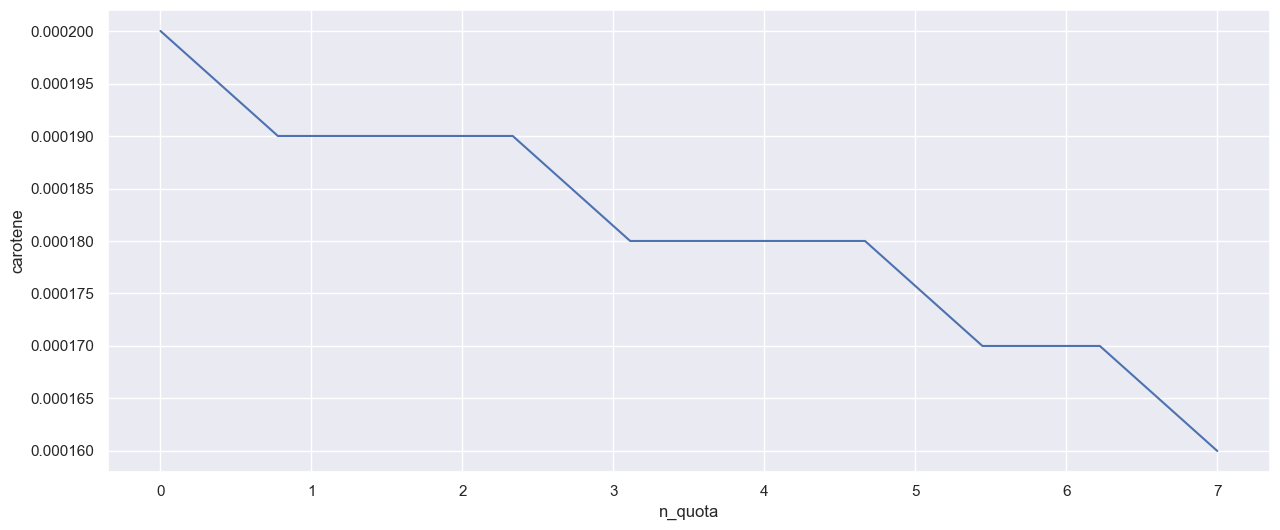

<AxesSubplot:xlabel='n_quota', ylabel='carotene'>

In [2]:
analysis.load_parameters(f"{DATA_PATH}/dfba/inputs/initial_parameters.json")
res = analysis.evaluate_dynamic_expression("carotene", "n_quota", param_range = (0, 7, 0.1))
lineplot(list(res.keys()), list(res.values()), xlabel="n_quota", ylabel="carotene")

In [59]:
import sympy as sp
def phi(x, rs):
    return 1 / (1 + sp.exp(-rs * x))

In [72]:
290*(7e-05) + 1e-02

0.0303

In [74]:
phi(290*(7e-05) + 1e-02 - 0.03, 40)

0.502999964000518

In [120]:
phi(240*(7e-05) + -5e-01 + 10* 0.001, 40)

0.130925544737275

In [109]:
290*(7e-05) + -7e-02 + 10* 0.004

-0.009700000000000007

In [55]:
2.15/1000*14.01

0.0301215

In [103]:
0.28* 30.97 / 1000

0.0086716

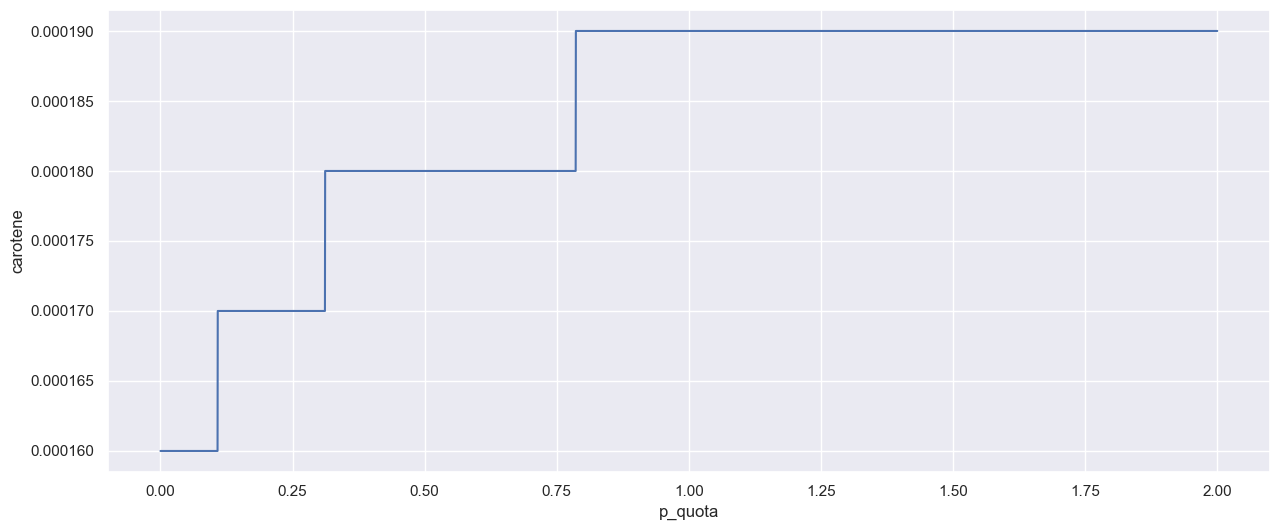

<AxesSubplot:xlabel='p_quota', ylabel='carotene'>

In [21]:
analysis.load_parameters(f"{DATA_PATH}/dfba/inputs/initial_parameters.json")
res = analysis.evaluate_dynamic_expression("carotene", "p_quota", param_range = (0, 2, 50))
lineplot(list(res.keys()), list(res.values()), xlabel="p_quota", ylabel="carotene")

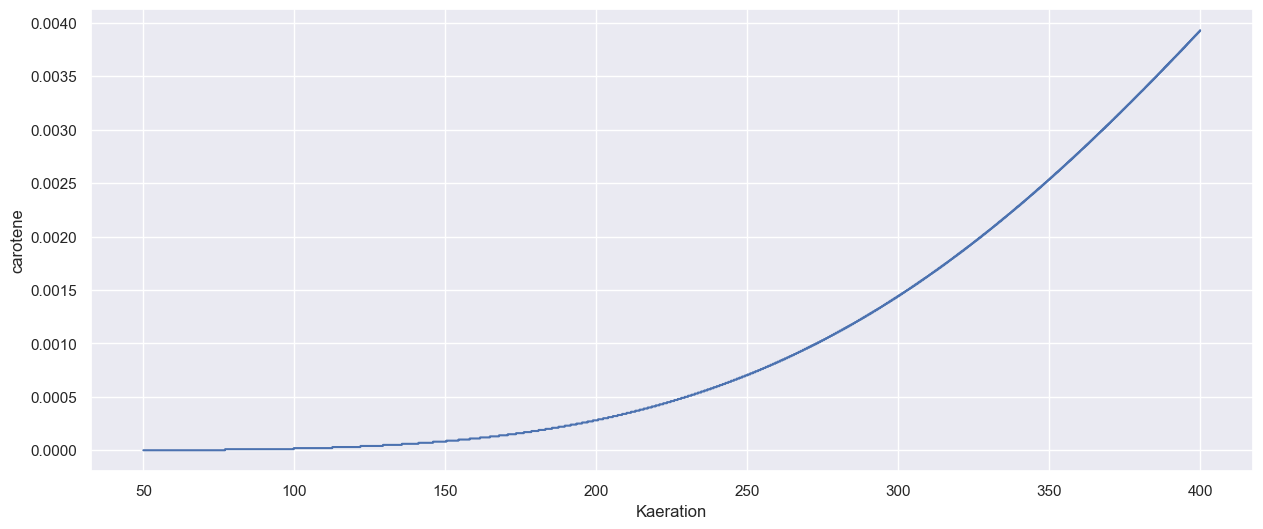

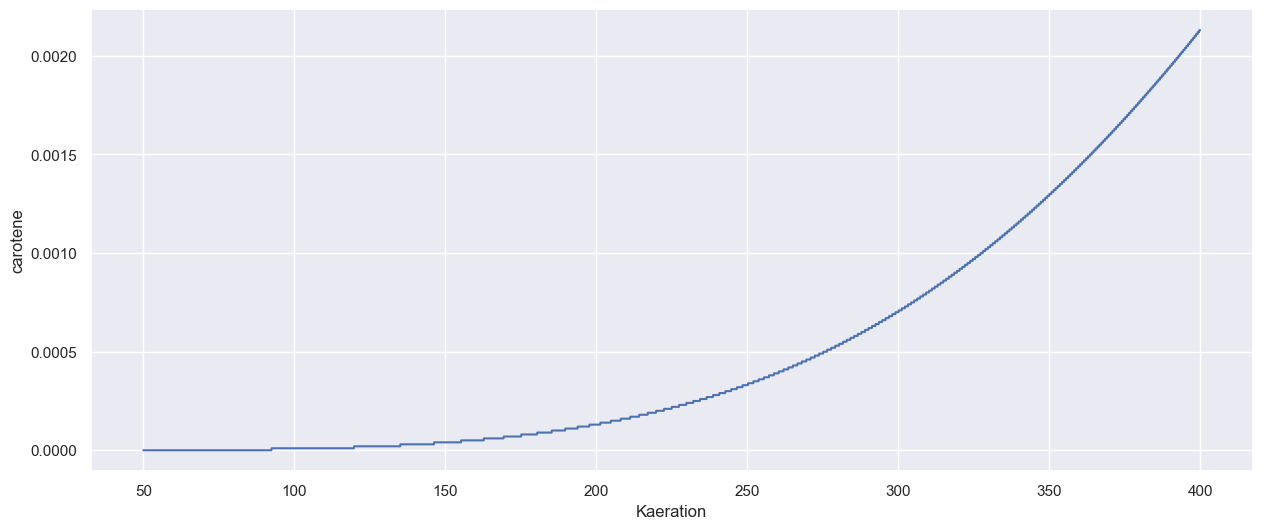

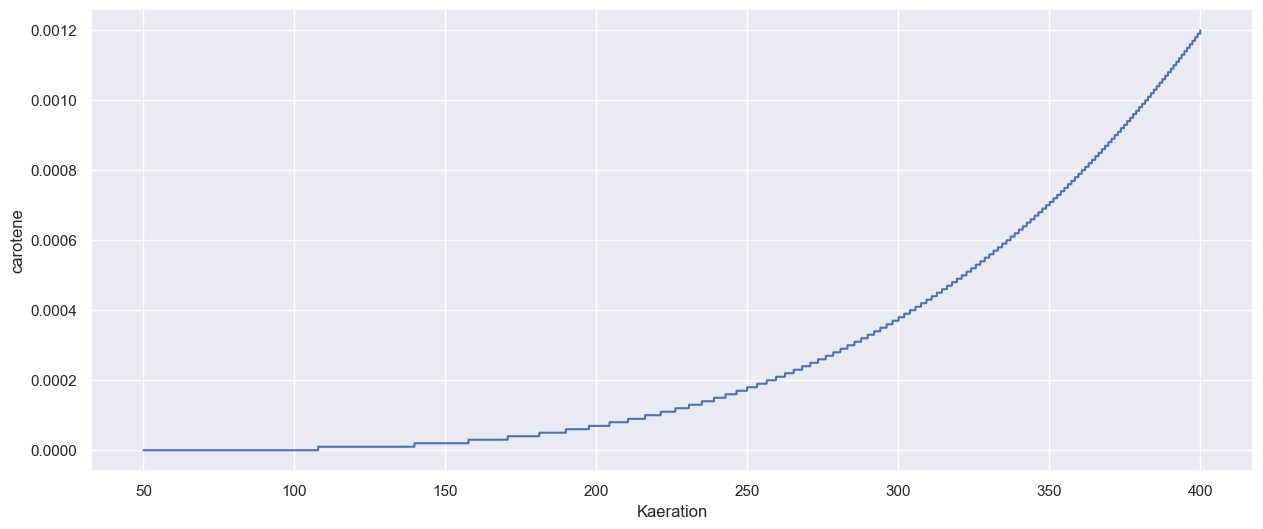

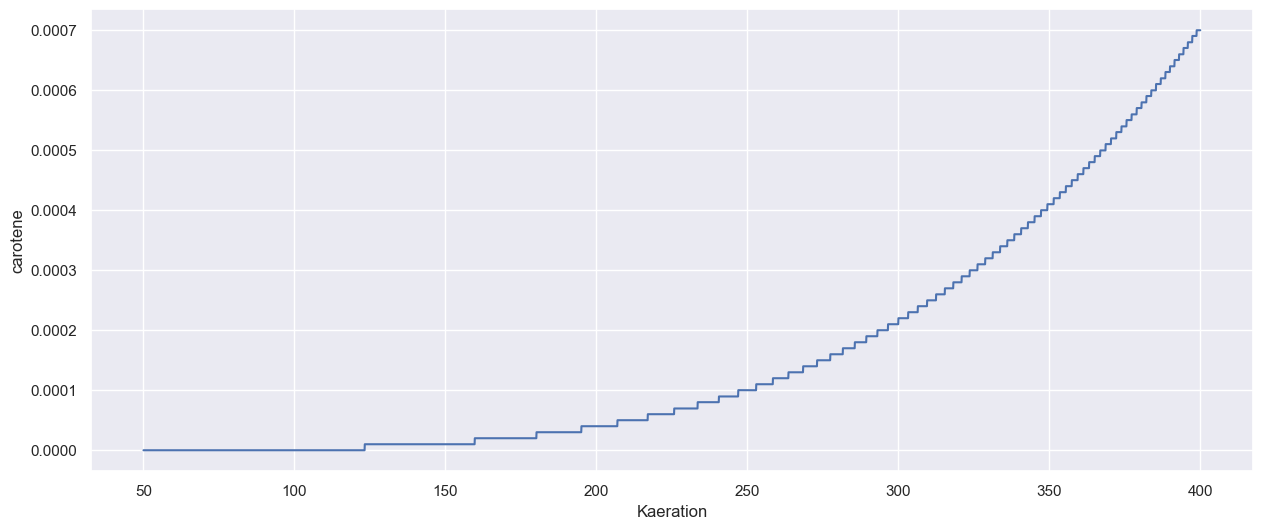

In [5]:
analysis.load_parameters(f"{DATA_PATH}/dfba/inputs/initial_parameters.json")
aeration = [500, 600, 700, 800]
complete_results = {}
for value in aeration:
    analysis.parameters["aeration"] = value
    res = analysis.evaluate_dynamic_expression("carotene", "Kaeration", param_range=[50, 400, 100])
    lineplot(list(res.keys()), list(res.values()), xlabel="Kaeration", ylabel="carotene")
    complete_results[value] = res

In [10]:
for key, value in complete_results.items():
    if round(key, 0) == 500:
        at500 = value
    if round(key, 0) == 600:
        at600 = value
    if round(key, 0) == 700:
        at700 = value
    if round(key, 0) == 800:
        at800 = value

In [18]:
at800_at500_ratio = {key: value/at500[key] for key, value in at800.items() if key in at500.keys() and at500[key] != 0}

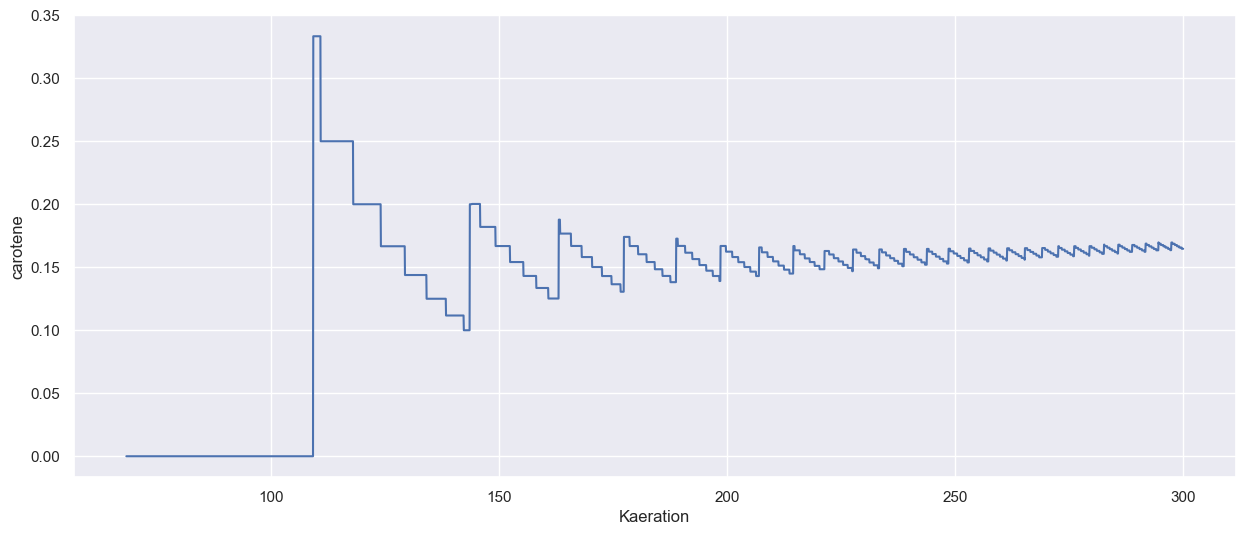

<AxesSubplot:xlabel='Kaeration', ylabel='carotene'>

In [21]:
lineplot(list(at800_at500_ratio.keys()), list(at800_at500_ratio.values()), xlabel="Kaeration", ylabel="carotene")

In [7]:
for key, value in res.items():
    if round(key, 0) == 600:
        at600 = value
    if round(key, 0) == 800:
        at800 = value

In [8]:
print(f"at 600: {at600}")
print(f"at 800: {at800}")
print(f"ratio: {at600/at800}")

at 600: 0.0010199546813964844
at 800: 0.0001100301742553711
ratio: 9.269772481040087


In [5]:
res = analysis.evaluate_dynamic_expression("starch_production", "x_storage")
lineplot(list(res.keys()), list(res.values()), xlabel="x_storage", ylabel="starch_production")

KeyError: 'x_storage'

In [ ]:
res = analysis.evaluate_dynamic_expression("tag", "n_quota")
lineplot(list(res.keys()), list(res.values()), xlabel="n_quota", ylabel="tag")

In [ ]:
analysis.load_parameters(f"{DATA_PATH}/dfba/inputs/initial_parameters.json")
res = analysis.evaluate_dynamic_expression("glycerol", "nacl", param_range= [0, 300, 1])
lineplot(list(res.keys()), list(res.values()), xlabel="NaCl", ylabel="glycerol")

In [ ]:
res = analysis.evaluate_dynamic_expression("glycerol", "p_quota")
lineplot(list(res.keys()), list(res.values()), xlabel="p_quota", ylabel="glycerol")

In [ ]:
analysis.load_parameters(f"{DATA_PATH}/dfba/inputs/initial_parameters.json")
res = analysis.evaluate_dynamic_expression("chlorophyll", "Ex0", param_range = [0, 2000, 100])
lineplot(list(res.keys()), list(res.values()), xlabel="Ex0 (mmol_photon/gDW/d)", ylabel="chlorophyll")

In [ ]:
res = analysis.evaluate_dynamic_expression("chlorophyll", "p_quota")
lineplot(list(res.keys()), list(res.values()), xlabel="p_quota", ylabel="chlorophyll")

In [ ]:
res = analysis.evaluate_dynamic_expression("chlorophyll", "n_quota", param_range = [4, 7, 10])
graph  = lineplot(list(res.keys()), list(res.values()), to_show=False, xlabel="n_quota", ylabel="chlorophyll")

In [ ]:
res = analysis.evaluate_dynamic_expression("chlorophyll", "aeration", param_range = [400, 1000, 50])
graph  = lineplot(list(res.keys()), list(res.values()), to_show=False, xlabel="aeration", ylabel="chlorophyll")